In [2]:
import csv, datetime, matplotlib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.parser import parse
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 16, 8

/usr/local/lib/python3.5/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
def getSentiment(sentence):
    '''
    This function will return polarity 
    scores given a sentence
    '''
    sid = SentimentIntensityAnalyzer()
    ps = sid.polarity_scores(str(sentence))
    return str(ps['compound'])

def toDateObj(stri):
    try:
        return parse(stri).date()
    except:
        return None
def parseUrl(url):
    '''
    This function returns categories in a url string
    '''
    return url.split('/')[2:5]

def getCategory(url):
    '''
    Extract category from url
    '''
    return parseUrl(url)[1]

def getCategory2(url):
    '''
    Extract sub category from url
    '''
    result = parseUrl(url)[2]
    if '-' in result:
        return '-'
    return result

In [4]:
headlines = pd.read_csv('NationMediaArticles.csv')
headlines['category'] = headlines['url'].apply(getCategory)
headlines['date'] = headlines['date'].apply(toDateObj)
headlines.sort_values(by='date')
headlines.tail()

,date,headline,paragraph,url,source,category
61003,2014-11-22,LeBron James frustrated as struggling Cavalier...,Struggling to come together with consistent te...,http://www.nation.co.ke/sports/Basketball/LeBr...,Daily Nation RSS Feeds: Home,sports
61004,2014-11-22,Bodies of 28 Shabaab attack victims in Mandera...,Police said none of the 28 who died in the Al-...,http://www.nation.co.ke/counties/Bodies-28-Sha...,Daily Nation RSS Feeds: Home,counties
61005,2014-11-22,Death toll from Marsabit clashes rises to 10,The death toll from the Wednesday clashes betw...,http://www.nation.co.ke/counties/Death-toll-fr...,Daily Nation RSS Feeds: Home,counties
61006,2014-11-22,Survivor says Al-Shabaab gunmen fired in jubil...,One of passengers who survived the attack said...,http://www.nation.co.ke/counties/-/1107872/253...,Daily Nation RSS Feeds: Home,counties
61007,2014-11-22,At least 28 killed in suspected Shabaab attack...,Initial reports indicated that about a 100 arm...,http://www.nation.co.ke/counties/28-dead-suspe...,Daily Nation RSS Feeds: Home,counties


In [5]:
stockData = pd.read_csv('NSEAllShareData.csv')
stockData['date'] = stockData['Date'].apply(toDateObj)
stockData.sort_values(by='Date')
stockData.tail()

,Date,Price,Open,High,Low,Vol.,Change %,date
1286,"Jan 07, 2013",97.55,97.55,97.55,97.55,0,0.26,2013-01-07
1287,"Jan 04, 2013",97.30,97.30,97.30,97.30,0,1.28,2013-01-04
1288,"Jan 03, 2013",96.07,96.07,96.07,96.07,0,0.54,2013-01-03
1289,"Jan 02, 2013",95.55,95.55,95.55,95.55,0,0.73,2013-01-02
1290,"Dec 31, 2012",94.86,94.86,94.86,94.86,0,0.08,2012-12-31


In [6]:
allData = headlines.merge(stockData, on=['date'], how='left').dropna(subset=['Date'])
allData

,date,headline,paragraph,url,source,category,Date,Price,Open,High,Low,Vol.,Change %
0,2015-05-21,Kenya loses over Sh600bn every year in tax eva...,Kenya loses an estimated Sh639 billion annuall...,http://www.nation.co.ke/business/Kenya-loses-o...,Daily Nation RSS Feeds: Home,business,"May 21, 2015",166.48,166.48,166.48,166.48,0.0,-0.54
1,2015-05-21,"Fight hard, Munya told after winning top seat",Mr Mvurya bowed out of the race after the gove...,http://www.nation.co.ke/news/politics/Tough-ta...,Daily Nation RSS Feeds: Home,news,"May 21, 2015",166.48,166.48,166.48,166.48,0.0,-0.54
2,2015-08-28,How we clinched deal to supply veges to superm...,"The group brings together over 2,400 farmers w...",http://www.nation.co.ke/business/seedsofgold/H...,Daily Nation | Home,business,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
3,2015-08-28,Online fraudster leaves my lovely friends high...,"The chama, which largely operates on WhatsApp,...",http://www.nation.co.ke/business/seedsofgold/O...,Daily Nation | Home,business,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
4,2015-08-28,Mrenda is a revered vegetable at the Kakuma Re...,The farm ran by refugees is easy to pick out f...,http://www.nation.co.ke/business/seedsofgold/-...,Daily Nation | Home,business,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
5,2015-08-28,Seven things you need to keep in mind on marke...,You should not attempt to put yourself in thei...,http://www.nation.co.ke/business/seedsofgold/S...,Daily Nation | Home,business,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
6,2015-08-28,Time to transform the agriculture sector is now,Drought and pests have adversely affected the ...,http://www.nation.co.ke/business/seedsofgold/T...,Daily Nation | Home,business,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
7,2015-08-28,Officers at centre of killing of protestor in ...,The man was killed during the demonstrations w...,http://www.nation.co.ke/news/suspects-in-death...,Daily Nation | Home,news,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
8,2015-08-28,Police repulse militants at border point,Five armed men tried to sneak into Kenya throu...,http://www.nation.co.ke/news/Police-Al-Shabaab...,Daily Nation | Home,news,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94
9,2015-08-28,Governors warn of anti-county laws,AG office auditing the implementation of the c...,http://www.nation.co.ke/news/politics/Governor...,Daily Nation | Home,news,"Aug 28, 2015",140.18,140.18,140.18,140.18,0.0,1.94


In [6]:
columns = ['paragraph', 'url','source','Date', 'Vol.', 'Open', 'High','Low']
allData['sentiment'] = allData['headline'].apply(getSentiment)
allData.drop(columns, inplace=True, axis=1)
allData

,date,headline,category,Price,Change %,sentiment
0,2015-05-21,Kenya loses over Sh600bn every year in tax eva...,business,166.48,-0.54,-0.3182
1,2015-05-21,"Fight hard, Munya told after winning top seat",news,166.48,-0.54,0.296
2,2015-08-28,How we clinched deal to supply veges to superm...,business,140.18,1.94,0.0
3,2015-08-28,Online fraudster leaves my lovely friends high...,business,140.18,1.94,0.5267
4,2015-08-28,Mrenda is a revered vegetable at the Kakuma Re...,business,140.18,1.94,0.5106
5,2015-08-28,Seven things you need to keep in mind on marke...,business,140.18,1.94,0.0
6,2015-08-28,Time to transform the agriculture sector is now,business,140.18,1.94,0.0
7,2015-08-28,Officers at centre of killing of protestor in ...,news,140.18,1.94,-0.6597
8,2015-08-28,Police repulse militants at border point,news,140.18,1.94,-0.5859
9,2015-08-28,Governors warn of anti-county laws,news,140.18,1.94,-0.1027


In [7]:
allData.to_csv("headlinesStock.csv")

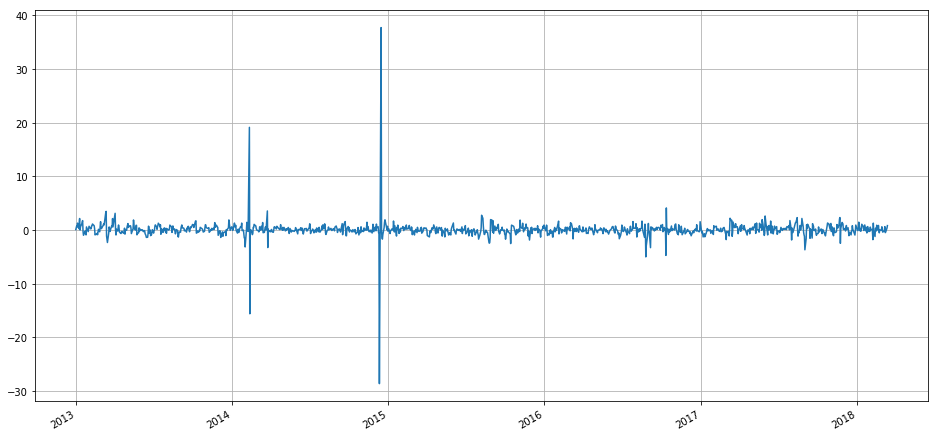

In [9]:

change = np.array(stockData['Change %'])
alldates = list(stockData['date'])
plt.plot(alldates, change)
plt.gcf().autofmt_xdate()
plt.grid()

In [39]:
sentiment = list(allData['sentiment'])
sentimentdates = list(allData['date'])
#all dates that are 
datesSentiment = []
for d in alldates:
    sentimentForday = np.array([float(sentiment[i]) for i, xy in enumerate(sentimentdates) if d==xy])
    datesSentiment.append(np.mean(sentimentForday))

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


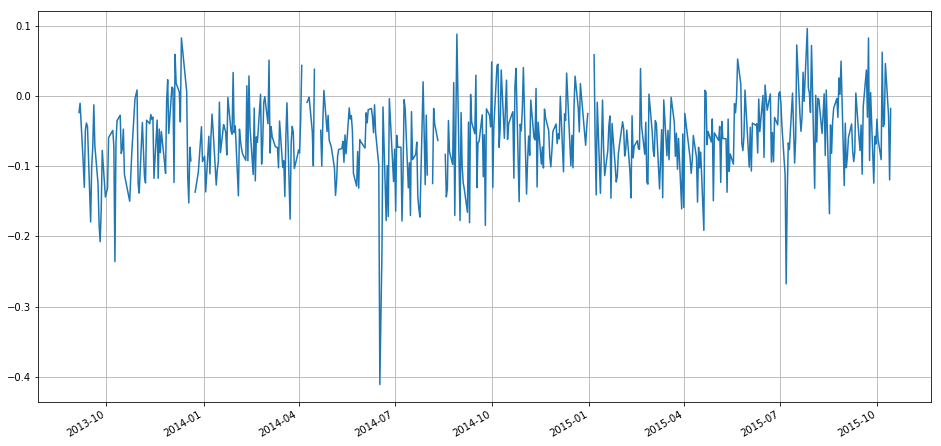

In [48]:
def norm(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

plt.plot(alldates, datesSentiment)
plt.gcf().autofmt_xdate()
plt.grid()